        popularity  acousticness  danceability  duration_ms  energy  \
0                1        0.2460         0.590       137373   0.737   
1                1        0.3810         0.451       194360   0.491   
2                1        0.8520         0.362       219600   0.436   
3                1        0.5130         0.855       183467   0.504   
4                1        0.6190         0.483       218187   0.497   
...            ...           ...           ...          ...     ...   
226408          99        0.1630         0.833       149520   0.539   
226409          99        0.0421         0.726       190440   0.554   
226410          99        0.1630         0.833       149520   0.539   
226411         100        0.5780         0.725       178640   0.321   
226412         100        0.5780         0.725       178640   0.321   

        instrumentalness  liveness  loudness   mode  speechiness    tempo  \
0               0.000000    0.1510    -5.559  Minor       0.0868  174.

<AxesSubplot:>

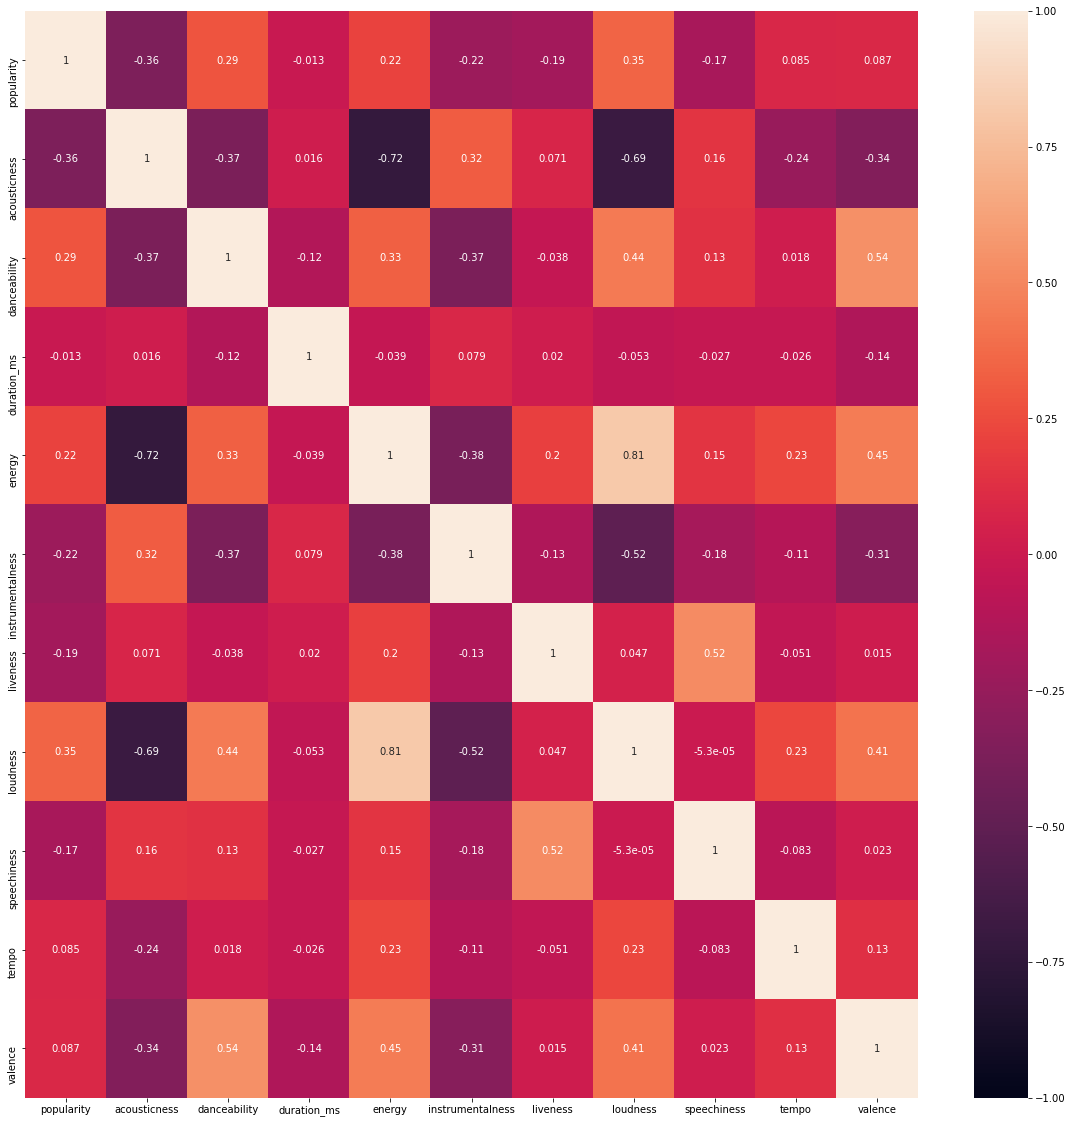

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset into my program
spotify = pd.read_csv('./SpotifyFeatures.csv')
# Drop columns
spotify.drop(columns = 'genre', inplace = True)
spotify.drop(columns = 'artist_name', inplace = True)
spotify.drop(columns = 'track_name', inplace = True)
spotify.drop(columns = 'track_id', inplace = True)

# Draw heatmap and pairplot
fig, ax = plt.subplots(figsize=(20,20))

sns.heatmap(spotify.corr(), vmin=-1, vmax=1,annot=True,ax = ax)

In [157]:
# https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

import time
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load dataset into my program
df = pd.read_csv('./SpotifyFeatures.csv')


# Drop columns
df.drop(columns = 'genre', inplace = True)
df.drop(columns = 'artist_name', inplace = True)
df.drop(columns = 'track_name', inplace = True)
df.drop(columns = 'track_id', inplace = True)
df.drop(columns = 'mode', inplace = True)

train, test = train_test_split(df, test_size=0.05, random_state=21)
df = test
np.random.seed(21)

popularity = df['popularity']
df.drop(columns = 'popularity', inplace = True)
data_subset = df.values
print(df)
print(data_subset)

        acousticness  danceability  duration_ms  energy  instrumentalness  \
171498       0.87200         0.580       133667  0.2210          0.000063   
15747        0.43400         0.184       339907  0.6510          0.796000   
23023        0.00241         0.504       426440  0.6180          0.000636   
191928       0.00121         0.635       218560  0.8480          0.000000   
5730         0.98700         0.174       219840  0.0576          0.004880   
...              ...           ...          ...     ...               ...   
137442       0.77700         0.753       258427  0.4300          0.087800   
16330        0.98200         0.277       128000  0.2830          0.047000   
175691       0.01120         0.768       193613  0.5570          0.000000   
27412        0.86800         0.608        95133  0.7200          0.000000   
204733       0.05410         0.675       260600  0.5010          0.000000   

        liveness  loudness  speechiness    tempo  valence  
171498    0.096

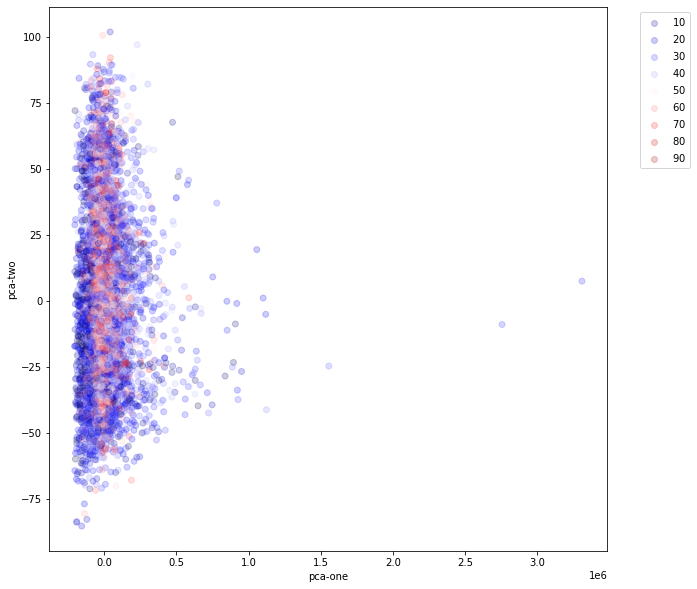

In [163]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
df['popularity'] = popularity


fig, ax = plt.subplots(figsize=(10,10))
sc = ax.scatter(
    x=df["pca-one"], 
    y=df["pca-two"], 
    c=df["popularity"], 
    cmap='seismic',
    alpha=0.2
)

plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
plt.show()

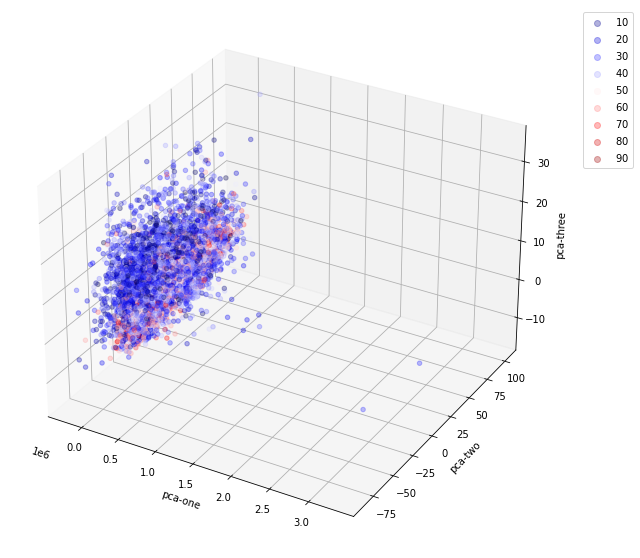

In [145]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
sc = ax.scatter(
    xs=df["pca-one"], 
    ys=df["pca-two"], 
    zs=df["pca-three"], 
    c=df["popularity"], 
    cmap='seismic',
    alpha=0.3
)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [146]:

tsne = TSNE(n_components=2, verbose=1, perplexity=100, n_iter=500, learning_rate=80)
tsne_results = tsne.fit_transform(data_subset)



[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 11321 samples in 0.009s...
[t-SNE] Computed neighbors for 11321 samples in 0.433s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11321
[t-SNE] Computed conditional probabilities for sample 2000 / 11321
[t-SNE] Computed conditional probabilities for sample 3000 / 11321
[t-SNE] Computed conditional probabilities for sample 4000 / 11321
[t-SNE] Computed conditional probabilities for sample 5000 / 11321
[t-SNE] Computed conditional probabilities for sample 6000 / 11321
[t-SNE] Computed conditional probabilities for sample 7000 / 11321
[t-SNE] Computed conditional probabilities for sample 8000 / 11321
[t-SNE] Computed conditional probabilities for sample 9000 / 11321
[t-SNE] Computed conditional probabilities for sample 10000 / 11321
[t-SNE] Computed conditional probabilities for sample 11000 / 11321
[t-SNE] Computed conditional probabilities for sample 11321 / 11321
[t-SNE] Mean sigma: 16.681183
[t-SNE] KL divergen

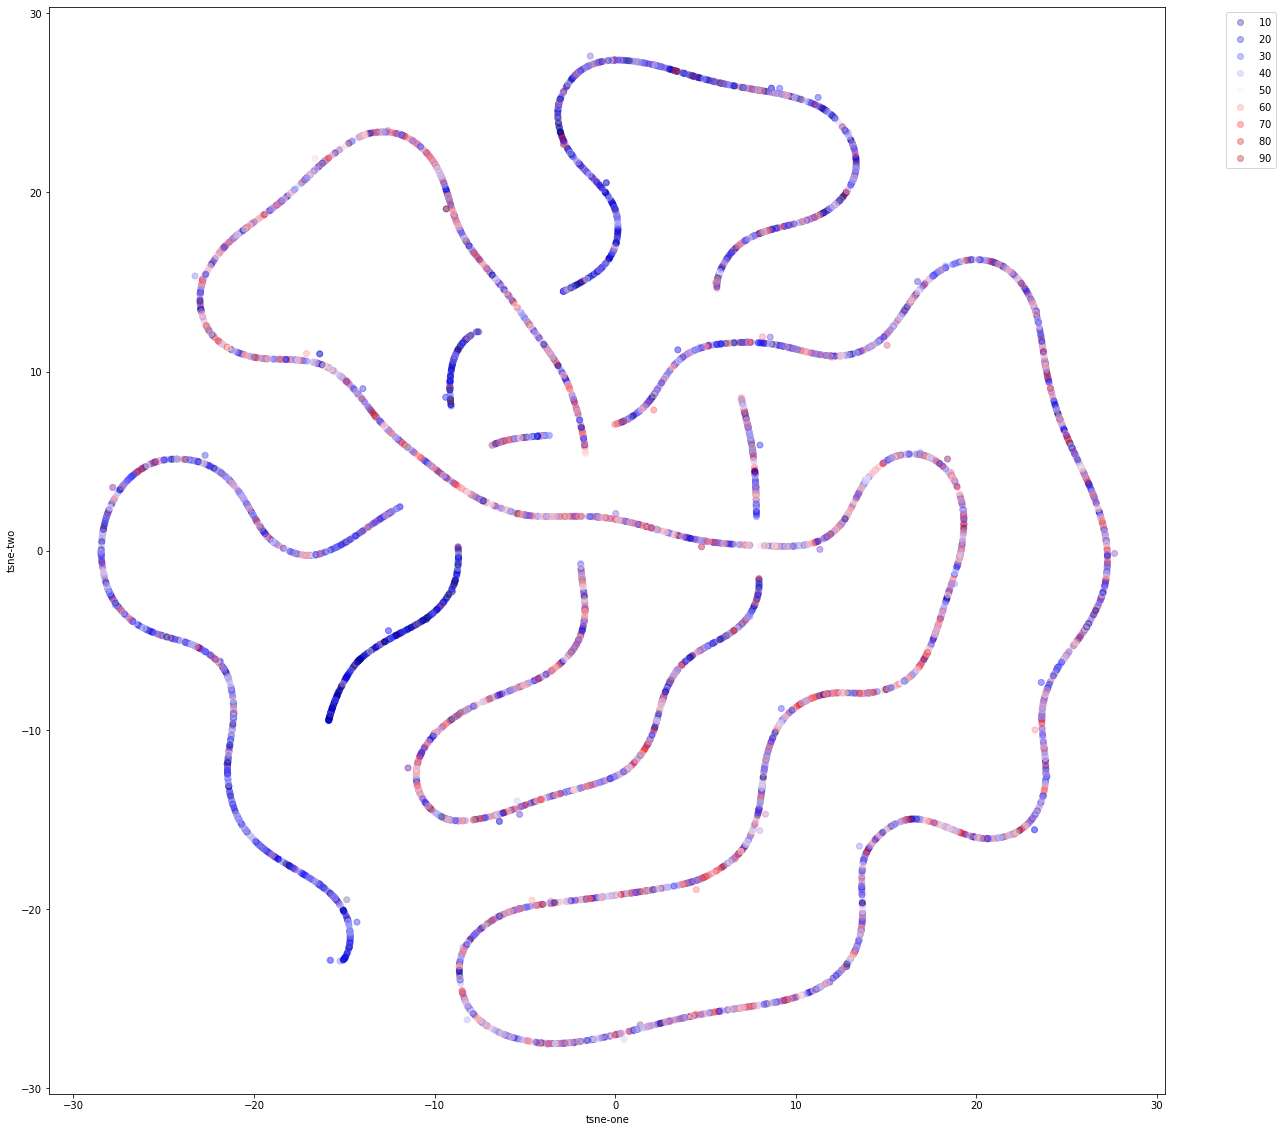

In [147]:

x = tsne_results[:,0]
y = tsne_results[:,1]
df['tsne-2d-one'] = x
df['tsne-2d-two'] = y
fig, ax = plt.subplots(figsize=(20,20))
sc = ax.scatter(
    x=df["tsne-2d-one"], 
    y=df["tsne-2d-two"], 
    c=df["popularity"], 
    cmap='seismic',
    alpha=0.3
)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
ax.set_xlabel('tsne-one')
ax.set_ylabel('tsne-two')
plt.show()

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 11321 samples in 0.011s...
[t-SNE] Computed neighbors for 11321 samples in 0.394s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11321
[t-SNE] Computed conditional probabilities for sample 2000 / 11321
[t-SNE] Computed conditional probabilities for sample 3000 / 11321
[t-SNE] Computed conditional probabilities for sample 4000 / 11321
[t-SNE] Computed conditional probabilities for sample 5000 / 11321
[t-SNE] Computed conditional probabilities for sample 6000 / 11321
[t-SNE] Computed conditional probabilities for sample 7000 / 11321
[t-SNE] Computed conditional probabilities for sample 8000 / 11321
[t-SNE] Computed conditional probabilities for sample 9000 / 11321
[t-SNE] Computed conditional probabilities for sample 10000 / 11321
[t-SNE] Computed conditional probabilities for sample 11000 / 11321
[t-SNE] Computed conditional probabilities for sample 11321 / 11321
[t-SNE] Mean sigma: 16.681183
[t-SNE] KL divergen

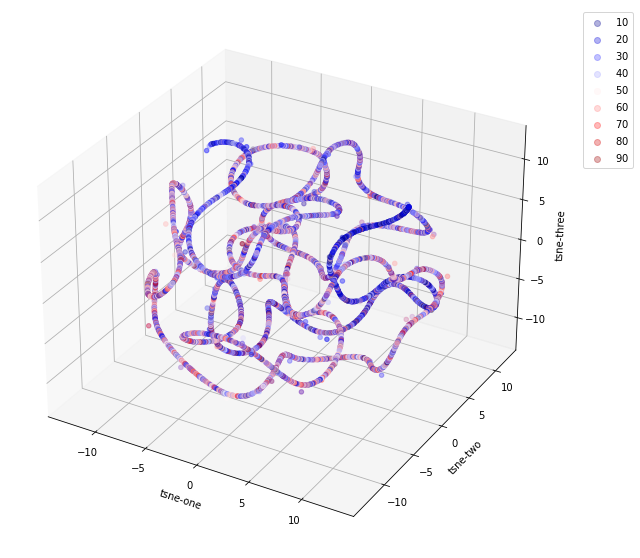

In [148]:

tsne = TSNE(n_components=3, verbose=1, perplexity=100, n_iter=500, learning_rate=80)
tsne_results = tsne.fit_transform(data_subset)


x = tsne_results[:,0]
y = tsne_results[:,1]
z = tsne_results[:,2]
df['tsne-3d-one'] = x
df['tsne-3d-two'] = y
df['tsne-3d-three'] = z

ax = plt.figure(figsize=(16,10)).gca(projection='3d')
sc = ax.scatter(
    xs=df['tsne-3d-one'], 
    ys=df['tsne-3d-two'], 
    zs=df['tsne-3d-three'], 
    c=df["popularity"], 
    cmap='seismic',
    alpha=0.3
)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
ax.set_xlabel('tsne-one')
ax.set_ylabel('tsne-two')
ax.set_zlabel('tsne-three')
plt.show()

In [150]:
# https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

import time
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load dataset into my program
df = pd.read_csv('./SpotifyFeatures.csv')


# Drop columns
df.drop(columns = 'genre', inplace = True)
df.drop(columns = 'artist_name', inplace = True)
df.drop(columns = 'track_name', inplace = True)
df.drop(columns = 'track_id', inplace = True)
df.drop(columns = 'mode', inplace = True)


total = [0,0,0,0,0,0,0,0,0,0,0]
for i in df.popularity:
    total[i//10] += 1

print(total)

train, test = train_test_split(df, test_size=0.3, random_state=21)
df = test
np.random.seed(21)

total = [0,0,0,0,0,0,0,0,0,0,0]
for i in df.popularity:
    total[i//10] += 1

print(total)

popularity = df['popularity']

[8205, 15933, 29889, 40584, 46785, 48563, 27453, 7762, 1109, 128, 2]
[2426, 4788, 9015, 12203, 13990, 14591, 8288, 2258, 325, 40, 0]


In [151]:
total = [0,0,0,0,0,0,0,0,0,0,0]
totalNum = 0
print(df)
newDf = df.values
print(newDf)



for i in range(len(newDf)-1,-1,-1):
    x = int(newDf[i][0])
    if(total[x//10] < 50):
        total[x//10] += 1
        totalNum += 1
    else:
        newDf = np.delete(newDf, i, 0)
    
    if totalNum >= 300:
        newDf = newDf[i:]
        break
        
newDf
    

        popularity  acousticness  danceability  duration_ms   energy  \
171498          55       0.87200        0.5800       133667  0.22100   
15747           15       0.43400        0.1840       339907  0.65100   
23023           19       0.00241        0.5040       426440  0.61800   
191928          60       0.00121        0.6350       218560  0.84800   
5730             7       0.98700        0.1740       219840  0.05760   
...            ...           ...           ...          ...      ...   
212598          67       0.11300        0.6430       198442  0.54500   
64645           32       0.00107        0.4840       147680  0.98300   
200458          62       0.47000        0.2210       116480  0.32000   
192150          60       0.41500        0.6650       351840  0.78900   
120558          45       0.98400        0.0808       305840  0.00285   

        instrumentalness  liveness  loudness  speechiness    tempo  valence  
171498          0.000063    0.0969   -16.701       0.0370

array([[1.40000e+01, 9.25000e-01, 6.85000e-01, ..., 8.81000e-01,
        7.10500e+01, 6.95000e-01],
       [2.10000e+01, 6.85000e-01, 6.79000e-01, ..., 4.79000e-01,
        1.14253e+02, 6.55000e-01],
       [2.90000e+01, 6.78000e-01, 7.16000e-01, ..., 1.33000e-01,
        9.59900e+01, 5.84000e-01],
       ...,
       [6.20000e+01, 4.70000e-01, 2.21000e-01, ..., 3.15000e-02,
        1.03511e+02, 2.34000e-01],
       [6.00000e+01, 4.15000e-01, 6.65000e-01, ..., 2.87000e-01,
        8.79500e+01, 6.10000e-01],
       [4.50000e+01, 9.84000e-01, 8.08000e-02, ..., 4.02000e-02,
        6.44800e+01, 3.75000e-02]])

In [152]:
print(len(newDf))

300


[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Indexed 300 samples in 0.000s...
[t-SNE] Computed neighbors for 300 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 300 / 300
[t-SNE] Mean sigma: 781.562378
[t-SNE] KL divergence after 250 iterations with early exaggeration: 42.265137
[t-SNE] KL divergence after 500 iterations: 0.081435


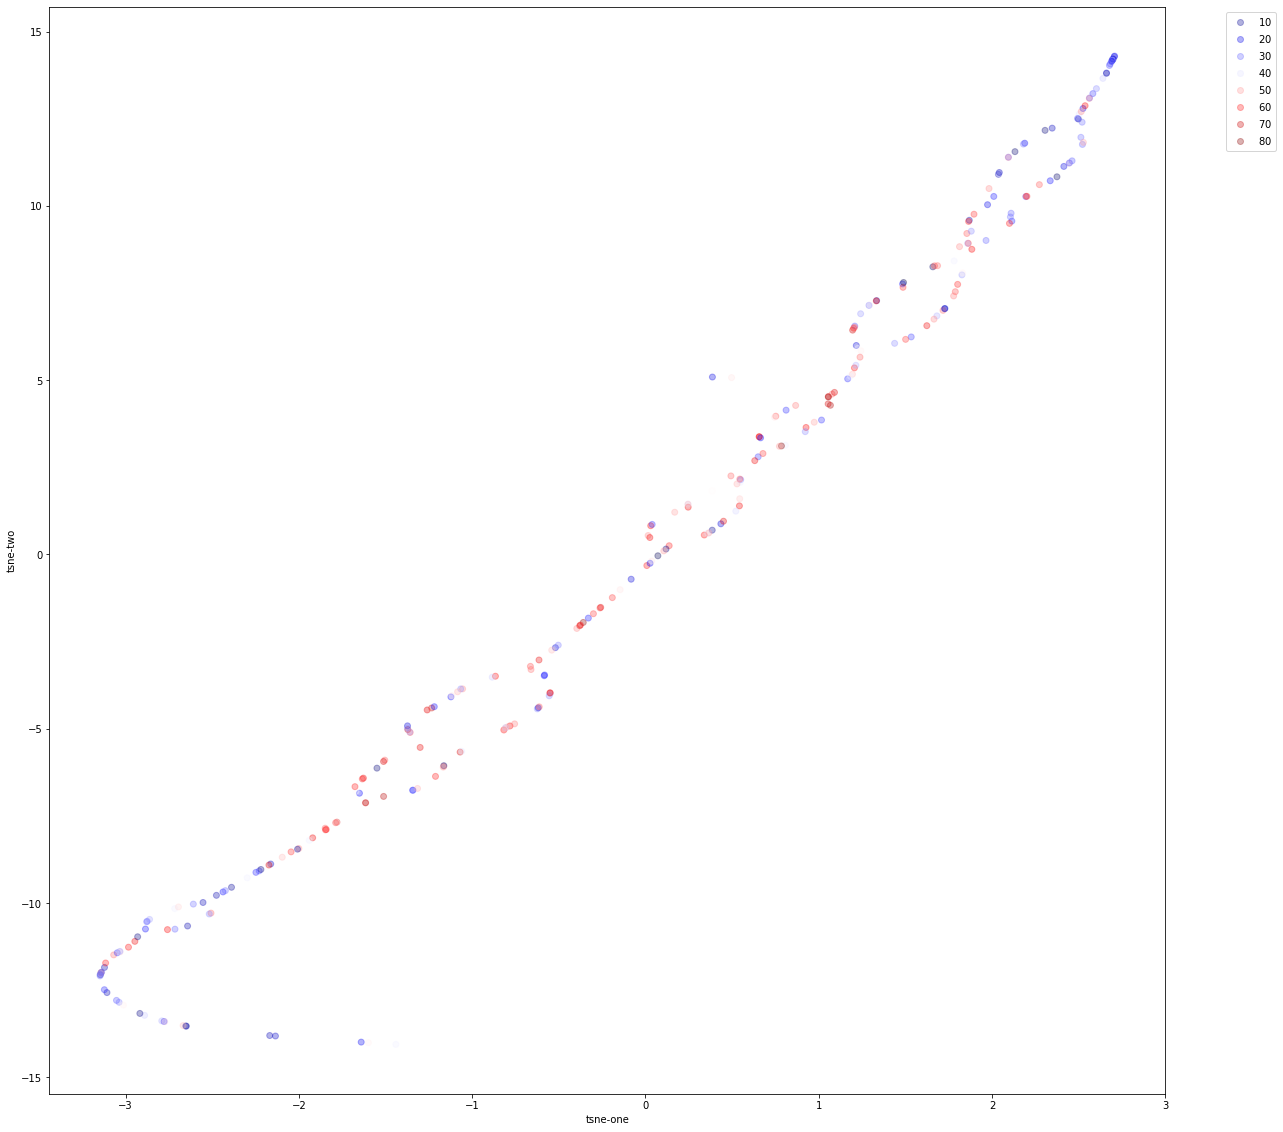

In [153]:
newDf = pd.DataFrame(newDf, columns = df.columns)

data_subset = newDf.values

tsne = TSNE(n_components=2, verbose=1, perplexity=60, n_iter=500, learning_rate=20)
tsne_results = tsne.fit_transform(data_subset)


x = tsne_results[:,0]
y = tsne_results[:,1]
newDf['tsne-2d-one'] = x
newDf['tsne-2d-two'] = y
fig, ax = plt.subplots(figsize=(20,20))

sc = ax.scatter(
    x=newDf["tsne-2d-one"], 
    y=newDf["tsne-2d-two"], 
    c=newDf["popularity"], 
    cmap='seismic',
    alpha=0.3
)

plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
ax.set_xlabel('tsne-one')
ax.set_ylabel('tsne-two')
plt.show()

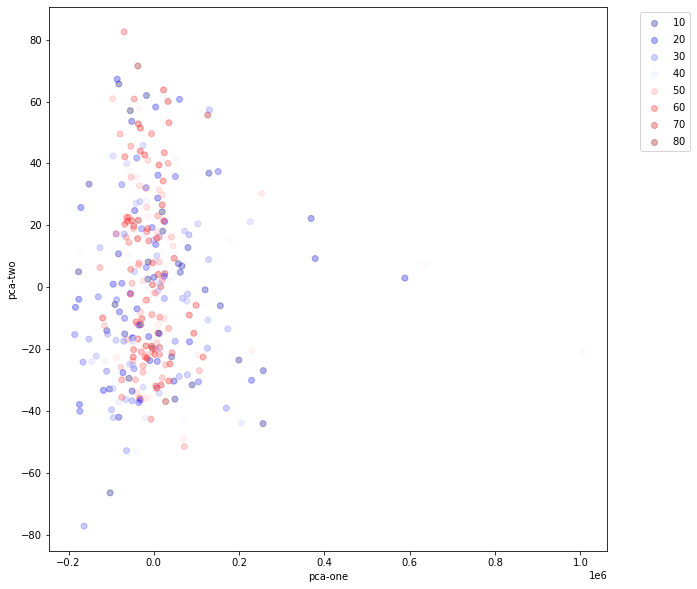

In [154]:
noPop = np.delete(data_subset, 0, 1)
pca = PCA(n_components=3)
pca_result = pca.fit_transform(noPop)
newDf['pca-one'] = pca_result[:,0]
newDf['pca-two'] = pca_result[:,1] 
newDf['pca-three'] = pca_result[:,2]


fig, ax = plt.subplots(figsize=(10,10))
sc = ax.scatter(
    x=newDf["pca-one"], 
    y=newDf["pca-two"], 
    c=newDf["popularity"], 
    cmap='seismic',
    alpha=0.3
)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
plt.show()

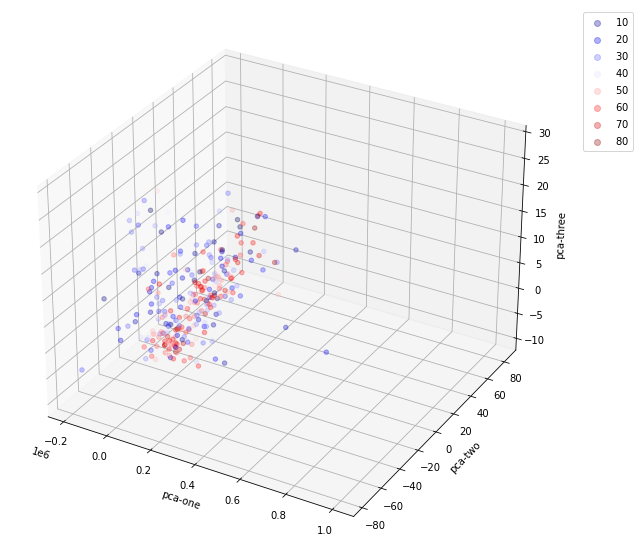

In [155]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
sc = ax.scatter(
    xs=newDf["pca-one"], 
    ys=newDf["pca-two"], 
    zs=newDf["pca-three"], 
    c=newDf["popularity"], 
    cmap='seismic',
    alpha=0.3
)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()